In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip "/content/drive/MyDrive/NECSTCamp/Data/volumes 0-49.zip"

Archive:  /content/drive/MyDrive/NECSTCamp/Data/volumes 0-49.zip
  inflating: volumes 0-49/volume-0.nii.gz  
  inflating: volumes 0-49/volume-1.nii.gz  
  inflating: volumes 0-49/volume-10.nii.gz  
  inflating: volumes 0-49/volume-11.nii.gz  
  inflating: volumes 0-49/volume-12.nii.gz  
  inflating: volumes 0-49/volume-13.nii.gz  
  inflating: volumes 0-49/volume-14.nii.gz  
  inflating: volumes 0-49/volume-15.nii.gz  
  inflating: volumes 0-49/volume-16.nii.gz  
  inflating: volumes 0-49/volume-17.nii.gz  
  inflating: volumes 0-49/volume-18.nii.gz  
  inflating: volumes 0-49/volume-19.nii.gz  
  inflating: volumes 0-49/volume-2.nii.gz  
  inflating: volumes 0-49/volume-20.nii.gz  
  inflating: volumes 0-49/volume-21.nii.gz  
  inflating: volumes 0-49/volume-22.nii.gz  
  inflating: volumes 0-49/volume-23.nii.gz  
  inflating: volumes 0-49/volume-24.nii.gz  
  inflating: volumes 0-49/volume-25.nii.gz  
  inflating: volumes 0-49/volume-26.nii.gz  
  inflating: volumes 0-49/volume-27.ni

In [3]:
!unzip "/content/drive/MyDrive/NECSTCamp/Data/volumes 50-99.zip"

Archive:  /content/drive/MyDrive/NECSTCamp/Data/volumes 50-99.zip
   creating: volumes 50-99/
 extracting: volumes 50-99/volume-50.nii.gz  
 extracting: volumes 50-99/volume-51.nii.gz  
 extracting: volumes 50-99/volume-52.nii.gz  
 extracting: volumes 50-99/volume-53.nii.gz  
  inflating: volumes 50-99/volume-54.nii.gz  
  inflating: volumes 50-99/volume-55.nii.gz  
 extracting: volumes 50-99/volume-56.nii.gz  
  inflating: volumes 50-99/volume-57.nii.gz  
 extracting: volumes 50-99/volume-58.nii.gz  
 extracting: volumes 50-99/volume-59.nii.gz  
 extracting: volumes 50-99/volume-60.nii.gz  
 extracting: volumes 50-99/volume-61.nii.gz  
 extracting: volumes 50-99/volume-62.nii.gz  
  inflating: volumes 50-99/volume-63.nii.gz  
 extracting: volumes 50-99/volume-64.nii.gz  
 extracting: volumes 50-99/volume-65.nii.gz  
 extracting: volumes 50-99/volume-66.nii.gz  
 extracting: volumes 50-99/volume-67.nii.gz  
  inflating: volumes 50-99/volume-68.nii.gz  
  inflating: volumes 50-99/volum

In [4]:
import tensorflow as tf
import os
import random
import numpy as np


from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

import nibabel


seed = 42
np.random.seed = seed

IMG_WIDTH = 256
IMG_HEIGHT = 256 
IMG_CHANNELS = 1

TRAIN_PATH = r"/content"
LABELS_PATH = r"/content/drive/MyDrive/NECSTCamp/Labels"
TEST_PATH = r"/content"


def extractImages(path, start, end):
    """
    PARAM
        path: location of directory which contains files to read
        start: index of the first image to read
        end: index of the last image to read
    RETURN
        a list of numpy arrays, each one representing an image in the path directory
        named from start to end
    """
    
    images = []
    if(path == LABELS_PATH): # it's in the LABELS_PATH directory
        prefix = 'labels-'
    else:
        prefix = 'volume-' # it's in the TRAIN_PATH or TEST_PATH directory
    
    tempPath = path
    for out in range(start, end):
        tempPath = os.path.join(path, prefix + str(out) + '.nii.gz')
        epiImg = nibabel.load(tempPath)
        epiImg = epiImg.get_fdata()
        kMax = int(epiImg.shape[2]/30)
        #epiImg = epiImg[:, :, 70]
        # print(len(epiImg.shape)) this is the number of channels (es. 2 => one channel)
        # print(epiImg[100][100])
        # print(type(epiImg[100][100]))
        
        if(prefix == 'labels-'):
            for i in range(0, len(epiImg)):
                for j in range(0, len(epiImg[i])):
                    for k in range(0, kMax):
                        temp = epiImg[:, :, k]
                        if (int(temp[j][i]) + 1) != 5:
                            temp[j][i] = 0.0
        #epiImg = resize(epiImg, (IMG_HEIGHT, IMG_WIDTH))
        for j in range(0, kMax):
            images.append(resize(epiImg[:, :, j], (IMG_HEIGHT, IMG_WIDTH)))
        print(out)
    return images

In [5]:
#Prepare dataset
# Train set
# images
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Loading images...')

trainOriginals = []
trainOriginals1 = np.array(extractImages(os.path.join(TRAIN_PATH, 'volumes 0-49'), 0, 50))
trainOriginals2 = np.array(extractImages(os.path.join(TRAIN_PATH, 'volumes 50-99'), 50, 75))
for img in trainOriginals1:
    trainOriginals.append(img)
for img in trainOriginals2:
    trainOriginals.append(img)
trainOriginals = np.array(trainOriginals)
print('trainOriginals done')


-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Loading images...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
trainOriginals done


In [6]:
# labels
trainLabels = np.array(extractImages(LABELS_PATH, 0, 75))  # 2 to change to 49
print('trainLabels done')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
trainLabels done


In [7]:
# Test set
# images
testOriginals = np.array(extractImages(os.path.join(TRAIN_PATH, 'volumes 50-99'), 75, 100))
print('testOriginals done')


75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
testOriginals done


In [8]:
# labels
testLabels = np.array(extractImages(LABELS_PATH, 75, 100))
print('testLabels done')

75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
testLabels done


In [9]:
def uNet():

    #Contraction path
    # 256x256
    c1 = tf.keras.layers.Conv2D(
        16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same', input_shape=(256, 256, 1))(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c1)

    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
    # 128x128
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p1)

    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c2)

    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
    # 64x64
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c3)

    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
    # 32x32
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c4)

    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
    # 16x16
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(
        128, (2, 2), strides=(2, 2), padding='same')(c5)
    # 32x32
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c6)

    # 64x64
    u7 = tf.keras.layers.Conv2DTranspose(
        64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c7)

    # 128x128
    u8 = tf.keras.layers.Conv2DTranspose(
        32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c8)

    # 256x256
    u9 = tf.keras.layers.Conv2DTranspose(
        16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                                kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    return outputs

In [10]:
#Build the model
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Building the model...')
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

outputs = uNet()

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()



#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    'model_for_nuclei.h5', verbose=1, save_best_only=True
    )

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
    ]

results = model.fit(trainOriginals, trainLabels, validation_split=0.1,
                    batch_size=8, epochs=5, callbacks=callbacks)

####################################

idx = random.randint(0, len(trainOriginals))


preds_train = model.predict(trainOriginals[:int(trainOriginals.shape[0]*0.9)], verbose=1)
preds_val = model.predict(trainOriginals[int(trainOriginals.shape[0]*0.9):], verbose=1)
preds_test = model.predict(testOriginals, verbose=1)


preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Building the model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 1)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  160         ['lambda[0][0]']                 
                                )                                                                 
                                       

In [15]:
def sanityCheck(trainOriginals, trainLabels, preds_train_t):
    ix = random.randint(0, len(preds_train_t))
    imshow(trainOriginals[ix])
    plt.show()
    imshow(trainLabels[ix])
    print(trainLabels[ix].shape)
    plt.show()
    imshow(preds_train_t[ix][:, :, 0])
    plt.show()

-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Sanity check: 


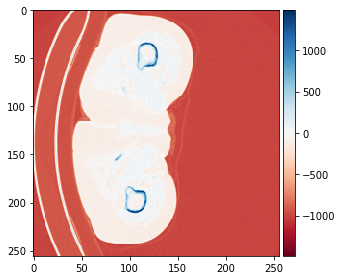

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


(256, 256)


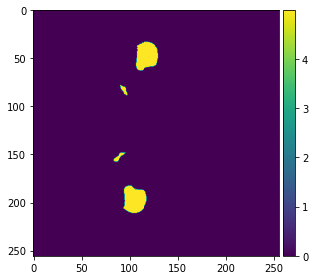

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


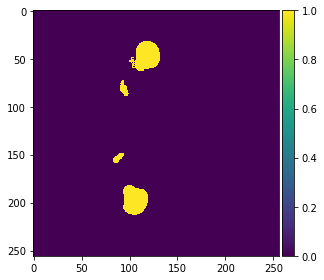

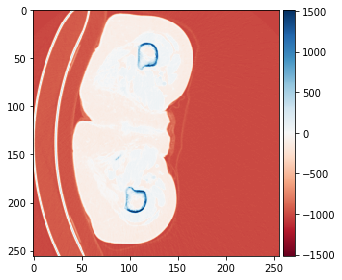

(256, 256)


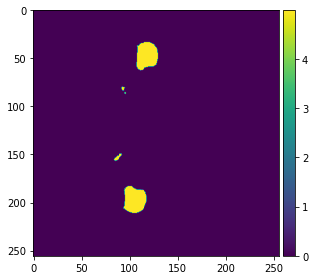

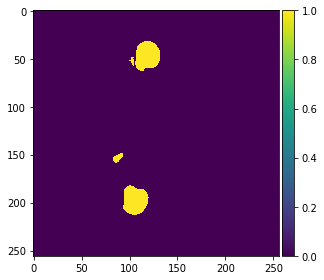

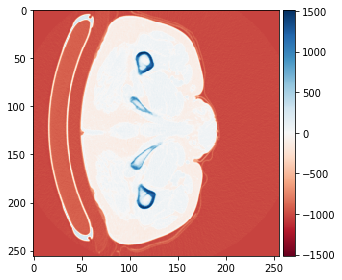

(256, 256)


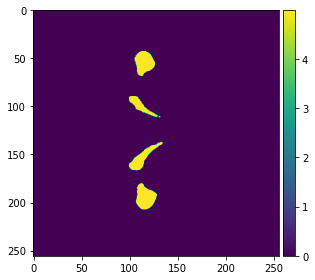

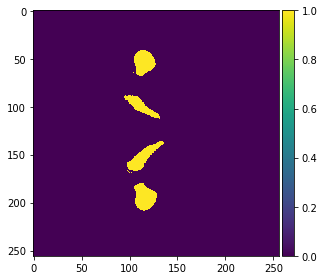

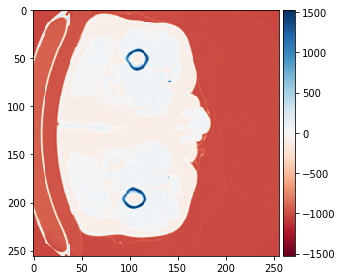

(256, 256)


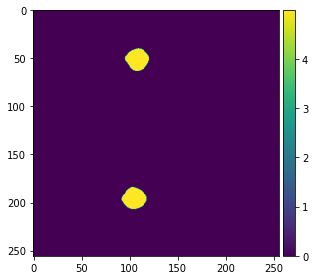

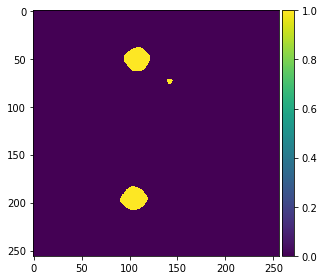

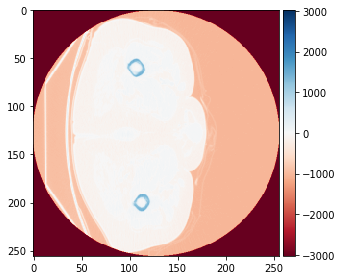

(256, 256)


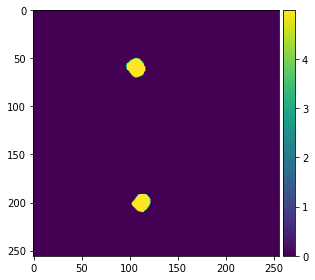

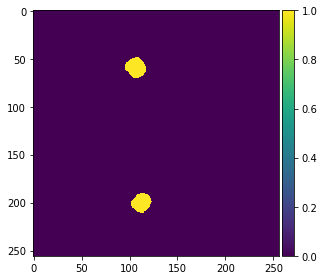

In [16]:
# Perform some sanity check on some random training samples
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Sanity check: ')
# 1
sanityCheck(trainOriginals, trainLabels, preds_train_t)
'''
ix = random.randint(0, len(preds_train_t))
imshow(trainOriginals[ix])
plt.show()
imshow(np.squeeze(trainLabels[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()'''
# 2
sanityCheck(trainOriginals, trainLabels, preds_train_t)
# 3
sanityCheck(trainOriginals, trainLabels, preds_train_t)
# 4
sanityCheck(trainOriginals, trainLabels, preds_train_t)
# 5
sanityCheck(trainOriginals, trainLabels, preds_train_t)